In [46]:
#Imports & Config
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')
import os
import joblib

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [47]:
#Fixed path to reach the 'data/processed' folder
file_path = "C:/Users/Admin/Desktop/INX_Employee_Performance_Project/data/processed/cleaned_employee_data.csv"
df = pd.read_csv(file_path)


# Load the cleaned dataset into df
#df = pd.read_csv(file_path)
# Load the data
df.to_csv("C:/Users/Admin/Desktop/INX_Employee_Performance_Project/data/processed/cleaned_employee_data.csv", index=False)


print("Data Loaded. Shape:", df.shape)
df.head()


Data Loaded. Shape: (1200, 28)


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [48]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_columns = [col for col in df.columns if col != 'PerformanceRating']

df[scaled_columns] = scaler.fit_transform(df[scaled_columns])


In [50]:
X = df.drop("PerformanceRating", axis=1)
y = df["PerformanceRating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print(f"Train Size: {X_train.shape}, Test Size: {X_test.shape}")


Train Size: (900, 27), Test Size: (300, 27)


In [51]:
import joblib

# Example: Prepare your data
df_encoded = pd.get_dummies(df, drop_first=True)  # or however you encoded
X = df_encoded.drop('PerformanceRating', axis=1)

# Save feature names
joblib.dump(X.columns.tolist(), 'models/saved/required_features.pkl')


['models/saved/required_features.pkl']

In [52]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(rf, params, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best Params:", grid.best_params_)


Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [53]:
y_pred = best_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[ 41   8   0]
 [  3 215   0]
 [  0   8  25]]

Classification Report:
              precision    recall  f1-score   support

           2       0.93      0.84      0.88        49
           3       0.93      0.99      0.96       218
           4       1.00      0.76      0.86        33

    accuracy                           0.94       300
   macro avg       0.95      0.86      0.90       300
weighted avg       0.94      0.94      0.93       300


Accuracy Score: 0.9366666666666666


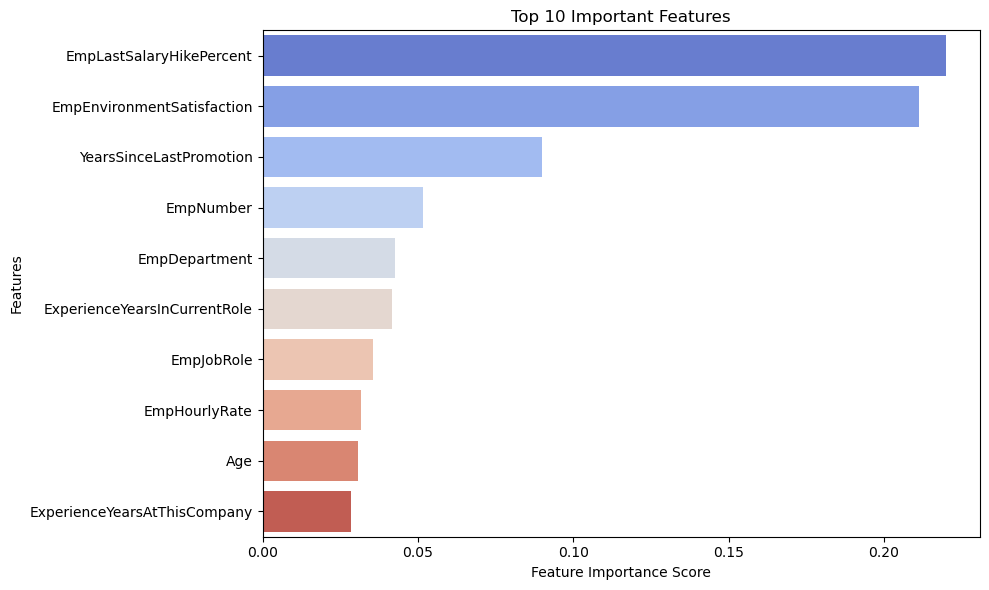

In [54]:
# Train the model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rf_model.fit(X_train, y_train)

# Now this will work
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feat_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index, palette='coolwarm')
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()



In [55]:
# ✅ Absolute path
model_dir = "C:/Users/Admin/Desktop/INX_Employee_Performance_Project/models/saved/"
os.makedirs(model_dir, exist_ok=True)

# Save model and scaler
joblib.dump(best_model, os.path.join(model_dir, "employee_perf_rf_model.pkl"))
joblib.dump(scaler, os.path.join(model_dir, "scaler.pkl"))

print("✅ Model and scaler saved successfully.")


✅ Model and scaler saved successfully.


In [56]:
import joblib

# Path to save the scaler
scaler_path = r'C:\Users\Admin\Desktop\INX_Employee_Performance_Project\models\saved\standard_scaler.pkl'

# Save the fitted scaler
joblib.dump(scaler, scaler_path)

print("✅ StandardScaler saved at:", scaler_path)


✅ StandardScaler saved at: C:\Users\Admin\Desktop\INX_Employee_Performance_Project\models\saved\standard_scaler.pkl
